# Coursework 2

Student name: Kym Hannah

Student ID: s2247460



## Part A: Significance Testing



### Dataset: Gender Representation in Video Games
This dataset contains information on several video games released between 2012 and 2022.

The dataset metadata states that the games were selected based on the following criteria:

>GAME SELECTION CRITERIA
> 1. The games must have a storyline. To analyze the paper of each character is essential that
games had a plot where characters had a role assigned (even if this role might change based
on the player's choices). This excludes games like:
> - Puzzle games: Tetris, Candy Crush, Minesweepers, etc.
> - Racing games: Gran Turismo, Formula 1, Mario Kart, etc.
> - Social Simulators: Animal Crossing, The Sims, etc.
> - MMORPGs, where the storyline lived by the player, might considerably differ from
other players, such as World of Warcraft.
> - Shooters with no story mode: Fornite, Valorant
> - Other popular games with no storyline: Minecraft, Roblox, League of Legends…
> 2. For games that offer a story and multiplayer modes (like some Call of Duty, GTA V…), just the
story mode is taken into consideration for this analysis.
> 3. The games were selected for being top-selling or best-rated games of the year.
> 4. At least 5 games were selected for each year.

#### Source: Kaggle
- Link: [Kaggle: Gender Representation in Video Games](https://www.kaggle.com/datasets/br33sa/gender-representation-in-video-games/data?select=characters.grivg.csv)
- License: [CC BY-NC 4.0](https://creativecommons.org/licenses/by-nc/4.0/)

Dataset was downloaded from Kaggle as this data would be available for public use. It has a Creative Commons License which allows for non-commercial use.

Kaggle gives the dataset a rating of 9.41 out of 10.0 which indicates that the dataset is of high quality (according to Kaggle).

![Kaggle rating](Images/Kaggle_Rating.png)

When looking at the provided Metadata, it states that:

>" This data has been compiled through research of several information sources including, but not
limited to:
> - Websites and media with a strong focus on video games like Metacritic, Destructoid, IGN, or
GameSpot.
> - Wikipedia
> - The websites of the games developers, games publishers, and the website of the game itself."

Keeping this in mind, the dataset should be reliable as it has been compiled from multiple sources which are known for their focus on video games.

#### Dataset composition
- Data structure: Tabular - 3 CSV files (related using common keys)
- CSV files:
    - characters.grivg.csv
    - games.grivg.csv
    - sexualization.grivg.csv

The dataset contains information on the characters in the video games, the games themselves, and the sexualization of the characters in the video games.


### Dataset Processing

First, the datasets will be loaded and reviewed to check for any missing values, duplicates, or other issues. Then, the datasets will be combined using the common keys, and the combined dataset will be cleaned and processed.  The data will be reviewed to ensure that it is ready for analysis.

#### Games dataset

In [4672]:
from statistics import LinearRegression
from unicodedata import category

# Notebook imports
import pandas as pd
import warnings

# Ignore all deprecation warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [4673]:
# Load the games dataset
games = pd.read_csv('Data/Gender_In_Video_Games/games.grivg.csv')
games.head()

,Game_Id,Title,Release,Series,Genre,Sub-genre,Developer,Publisher,Country,Platform,...,Director,Total_team,female_team,Team_percentage,Metacritic,Destructoid,IGN,GameSpot,Avg_Reviews,Unnamed: 27
0,GTAV,Grand Theft Auto V,Nov-13,GTA,Action-adventure,Action-adventure,Rockstar North,Rockstar Games,GBR,Multi,...,M,7,0,0%,9.7,9.0,10.0,9.0,9.4,NaN
1,PSS,Pokémon Sword/Shield,Nov-19,Pokémon,RPG,RPG,Game Freak,Nintendo,JPN,Nintendo Switch,...,M,9,1,11%,8.0,7.0,9.3,9.0,8.3,NaN
2,CODMW,Call of Duty: Modern Warfare,Oct-19,Call of Duty,Action,FPS,Infinity Ward,Activision,USA,Multi,...,M,11,0,0%,8.0,8.0,8.0,7.0,7.8,NaN
3,RDR2,Red Dead Redemption 2,Dec-18,Red Dead,Action-adventure,Action-adventure,Rockstar Studios,Rockstar Games,USA,Multi,...,M,7,0,0%,9.7,9.5,10.0,9.0,9.6,NaN
4,SMO,Super Mario Odyssey,Oct-17,Super Mario,Action-adventure,Action-adventure,Nintendo EDP,Nintendo,JPN,Nintendo Switch,...,M,11,1,9%,9.7,9.5,10.0,10.0,9.8,NaN


The games dataset has been loaded successfully. The dataset contains the following columns:

In [4674]:
# Check the shape of the dataset
print(f"Number of rows: {games.shape[0]}")
print(f"Number of columns: {games.shape[1]}")

Number of rows: 64
Number of columns: 28


In [4675]:
# Check the columns in the dataset
games.columns

Index(['Game_Id', 'Title', 'Release', 'Series', 'Genre', 'Sub-genre',
       'Developer', 'Publisher', 'Country', 'Platform', 'PEGI',
       'Customizable_main', 'Protagonist', 'Protagonist_Non_Male',
       'Relevant_males', 'Relevant_no_males', 'Percentage_non_male',
       'Criteria', 'Director', 'Total_team', 'female_team', 'Team_percentage',
       'Metacritic ', 'Destructoid', 'IGN', 'GameSpot', 'Avg_Reviews',
       'Unnamed: 27'],
      dtype='object')

Whitespace has been detected in the column names, this will be removed to avoid any issues.

In [4676]:
# Remove whitespace from column names
games.columns = games.columns.str.strip()
games.columns

Index(['Game_Id', 'Title', 'Release', 'Series', 'Genre', 'Sub-genre',
       'Developer', 'Publisher', 'Country', 'Platform', 'PEGI',
       'Customizable_main', 'Protagonist', 'Protagonist_Non_Male',
       'Relevant_males', 'Relevant_no_males', 'Percentage_non_male',
       'Criteria', 'Director', 'Total_team', 'female_team', 'Team_percentage',
       'Metacritic', 'Destructoid', 'IGN', 'GameSpot', 'Avg_Reviews',
       'Unnamed: 27'],
      dtype='object')

Next, the dataset will be checked for missing values.

In [4677]:
# Check for missing values
games.isnull().sum()

Game_Id                  0
Title                    0
Release                  0
Series                  37
Genre                    0
Sub-genre                0
Developer                0
Publisher                0
Country                  0
Platform                 0
PEGI                     0
Customizable_main        0
Protagonist              0
Protagonist_Non_Male     0
Relevant_males           0
Relevant_no_males        0
Percentage_non_male      0
Criteria                 0
Director                 0
Total_team               0
female_team              0
Team_percentage          0
Metacritic               0
Destructoid              7
IGN                      2
GameSpot                 2
Avg_Reviews              0
Unnamed: 27             64
dtype: int64

Missing values were found in the Series column. The null values will be replaced with 'None'.

The missing values are removed to ensure that the dataset is clean and ready for analysis.

In [4678]:
# Filter the rows with null values in the 'series' column
games_with_null_series = games[games['Series'].isnull()]

# Print the filtered rows
games_with_null_series

,Game_Id,Title,Release,Series,Genre,Sub-genre,Developer,Publisher,Country,Platform,...,Director,Total_team,female_team,Team_percentage,Metacritic,Destructoid,IGN,GameSpot,Avg_Reviews,Unnamed: 27
13,INS,Inside,Jun-16,NaN,Action,Puzzle-Platform,Paydead,Playdead,DNK,Multi,...,M,2,0,0%,9.1,9.5,10.0,8.0,9.2,NaN
14,UT,Undertale,Sep-15,NaN,RPG,RPG,Toby Fox,Toby Fox,USA,Multi,...,M,2,1,50%,9.2,10.0,10.0,9.0,9.6,NaN
15,BB,Bloodborne,Mar-15,NaN,RPG,Action RPG,FromSoftware,Sony Computer Entertainment,JPN,PS4,...,M,5,0,0%,9.2,9.0,9.1,9.0,9.1,NaN
16,SK,Shovel Knight: Shovel of Hope,Jun-14,NaN,Action,Platform,Yacht Club Games,Yacht Club Games,USA,Multi,...,M,9,1,11%,8.8,9.0,9.0,8.0,8.7,NaN
17,PP,"Papers, Please",Aug-13,NaN,Simulation,Puzzle Simulation,3909 LLC,3909 LLC,USA,Multi,...,M,1,0,0%,8.9,NaN,8.7,8.0,8.5,NaN
18,TLOU,The Last of Us,Jun-13,NaN,Action-adventure,Action-adventure,Naughty Dog,Sony Computer Entertainment,USA,PS3,...,M,7,0,0%,9.5,10.0,10.0,8.0,9.4,NaN
20,HLM,Hotline Miami,Oct-12,NaN,Action,Top-down Shooter,Dennaton Games,Devolver Digital,SWE,Multi,...,M,2,0,0%,8.6,9.0,8.8,8.5,8.7,NaN
21,JRN,Journey,Mar-12,NaN,Adventure,Adventure,Thatgamecompany,Sony Computer Entertainment,USA,PS3,...,M,7,1,14%,9.2,9.0,9.0,9.5,9.2,NaN
24,TN,Tunic,Sep-22,NaN,Action-adventure,Action-adventure,Andrew Shouldice,Finji,CAN,Multi,...,M,3,0,0%,8.5,9.0,9.0,9.0,8.9,NaN
25,ER,Elden Ring,Feb-22,NaN,RPG,Action RPG,FromSoftware,Bandai Namco Entertainment,JPN,Multi,...,M,6,0,0%,9.5,10.0,10.0,10.0,9.9,NaN


In [4679]:
# Replace the null values in the 'series' column with 'None'
games.fillna({'Series': 'None'}, inplace=True)
games.isnull().sum()

Game_Id                  0
Title                    0
Release                  0
Series                   0
Genre                    0
Sub-genre                0
Developer                0
Publisher                0
Country                  0
Platform                 0
PEGI                     0
Customizable_main        0
Protagonist              0
Protagonist_Non_Male     0
Relevant_males           0
Relevant_no_males        0
Percentage_non_male      0
Criteria                 0
Director                 0
Total_team               0
female_team              0
Team_percentage          0
Metacritic               0
Destructoid              7
IGN                      2
GameSpot                 2
Avg_Reviews              0
Unnamed: 27             64
dtype: int64

Next, the 'Unnamed' column will be dropped as it is not needed.

In [4680]:
# Drop the 'Unnamed' column
games.drop(columns=['Unnamed: 27'], inplace=True)
games.head()

,Game_Id,Title,Release,Series,Genre,Sub-genre,Developer,Publisher,Country,Platform,...,Criteria,Director,Total_team,female_team,Team_percentage,Metacritic,Destructoid,IGN,GameSpot,Avg_Reviews
0,GTAV,Grand Theft Auto V,Nov-13,GTA,Action-adventure,Action-adventure,Rockstar North,Rockstar Games,GBR,Multi,...,MS,M,7,0,0%,9.7,9.0,10.0,9.0,9.4
1,PSS,Pokémon Sword/Shield,Nov-19,Pokémon,RPG,RPG,Game Freak,Nintendo,JPN,Nintendo Switch,...,MS,M,9,1,11%,8.0,7.0,9.3,9.0,8.3
2,CODMW,Call of Duty: Modern Warfare,Oct-19,Call of Duty,Action,FPS,Infinity Ward,Activision,USA,Multi,...,MS,M,11,0,0%,8.0,8.0,8.0,7.0,7.8
3,RDR2,Red Dead Redemption 2,Dec-18,Red Dead,Action-adventure,Action-adventure,Rockstar Studios,Rockstar Games,USA,Multi,...,SR,M,7,0,0%,9.7,9.5,10.0,9.0,9.6
4,SMO,Super Mario Odyssey,Oct-17,Super Mario,Action-adventure,Action-adventure,Nintendo EDP,Nintendo,JPN,Nintendo Switch,...,SR,M,11,1,9%,9.7,9.5,10.0,10.0,9.8


In [4681]:
games.isnull().sum()

Game_Id                 0
Title                   0
Release                 0
Series                  0
Genre                   0
Sub-genre               0
Developer               0
Publisher               0
Country                 0
Platform                0
PEGI                    0
Customizable_main       0
Protagonist             0
Protagonist_Non_Male    0
Relevant_males          0
Relevant_no_males       0
Percentage_non_male     0
Criteria                0
Director                0
Total_team              0
female_team             0
Team_percentage         0
Metacritic              0
Destructoid             7
IGN                     2
GameSpot                2
Avg_Reviews             0
dtype: int64

Next, the gaming reviews columns will be checked for missing values.  As the average of the reviews have already been calculated, The missing values in the reviews columns will be left as null.
If the average had not been already been worked out, the missing values would have been replaced with the average of the other reviews.

In [4682]:
# Check null values for gaming reviews (Destruktoid, IGN, GameSpot, Metacritic)
games[['Metacritic', 'Destructoid', 'IGN', 'GameSpot']].isnull().sum()

Metacritic     0
Destructoid    7
IGN            2
GameSpot       2
dtype: int64

In [4683]:
# Print the rows with null reviews values
games_with_null_reviews = games[games[['Metacritic', 'Destructoid', 'IGN', 'GameSpot']].isnull().any(axis=1)]
games_with_null_reviews

,Game_Id,Title,Release,Series,Genre,Sub-genre,Developer,Publisher,Country,Platform,...,Criteria,Director,Total_team,female_team,Team_percentage,Metacritic,Destructoid,IGN,GameSpot,Avg_Reviews
8,CODBO2,Call of Duty: Black Ops 2,Nov-12,Call of Duty,Action,FPS,Treyarch,Activision,USA,Multi,...,MS,M,10,0,0%,8.0,NaN,9.3,8.0,8.4
17,PP,"Papers, Please",Aug-13,None,Simulation,Puzzle Simulation,3909 LLC,3909 LLC,USA,Multi,...,TR,M,1,0,0%,8.9,NaN,8.7,8.0,8.5
31,IWATE,I Was a Teenage Exocolonist,Aug-22,None,RPG,Strategy RPG,Northway Gates,Finji,CAN,Multi,...,TR,F,6,4,67%,8.9,NaN,NaN,NaN,8.9
36,ITT,It Takes Two,Mar-21,None,Action-adventure,Action-adventure,Hazelight Studios,EA,SWE,Multi,...,TR,M,5,1,20%,8.9,NaN,9.0,9.0,9.0
42,TINGWD,There is No Game: Wrong Dimension,Aug-20,None,Interactive Story,Interactive Story,Draw Me A Pixel,Draw Me A Pixel,FRA,Computer,...,TR,M,6,2,33%,8.8,NaN,NaN,9.6,9.2
50,DC,Dead Cells,Aug-18,None,Action-adventure,Metroidvania,Motion Twin,Motion Twin,FRA,Multi,...,TR,M,2,0,0%,8.8,NaN,9.5,9.0,9.1
58,DS2,Dark Souls 2,Mar-14,Dark Souls,RPG,Action RPG,FromSoftware,Bandai Namco Games,JPN,Multi,...,TR,M,7,0,0%,9.1,NaN,9.0,9.0,9.0
61,FLR,Florence,Feb-18,None,Interactive Story,Interactive Story,Mountains,Annapurna Interactive,USA,Mobile,...,TR,M,2,0,0%,8.7,8.0,9.6,NaN,8.8


Next, the dataset will be checked for duplicates.

In [4684]:
# Find duplicates in the dataset
duplicates = games[games.duplicated()]
duplicates

,Game_Id,Title,Release,Series,Genre,Sub-genre,Developer,Publisher,Country,Platform,...,Criteria,Director,Total_team,female_team,Team_percentage,Metacritic,Destructoid,IGN,GameSpot,Avg_Reviews


No duplicates were found in the dataset. The dataset is now clean and ready to be combined with the other datasets.

#### Characters dataset

The characters dataset contains information on the characters in the video games.

First, the dataset will be loaded and reviewed.

In [4685]:
# Load the characters dataset
characters = pd.read_csv('data/Gender_In_Video_Games/characters.grivg.csv')
characters.head()

,Name,Gender,Game,Age,Age_range,Playable,Sexualization,Id,Species,Side,Relevance,Romantic_Interest
0,Farah,Female,CODMW,27,Adult,1,0,CODMW_Farah,Human,P,PA,No
1,Protagonist,Custom,PSS,Teenager,Teenager,1,0,PSS_Protagonist,Human,P,PA,No
2,Magnolia,Female,PSS,Elderly,Elderly,0,0,PSS_Magnolia,Human,P,SC,No
3,Sonia,Female,PSS,26,Adult,0,0,PSS_Sonia,Human,P,SC,No
4,Marnie,Female,PSS,Teenager,Teenager,0,0,PSS_Marnie,Human,B,MC,No


The characters dataset has been loaded successfully. The dataset contains the following columns:

In [4686]:
# Check the shape of the dataset
print(f"Number of rows: {characters.shape[0]}")
print(f"Number of columns: {characters.shape[1]}")

Number of rows: 637
Number of columns: 12


In [4687]:
# Check the columns in the dataset
characters.columns

Index(['Name', 'Gender', 'Game', 'Age', 'Age_range', 'Playable',
       'Sexualization', 'Id', 'Species', 'Side', 'Relevance',
       'Romantic_Interest'],
      dtype='object')

The dataset has 12 columns containing data related to the characters in the video games. The columns will be reviewed to check for any missing values or duplicates.

In [4688]:
# Check for missing values
characters.isnull().sum()

Name                 0
Gender               0
Game                 0
Age                  0
Age_range            0
Playable             0
Sexualization        0
Id                   0
Species              0
Side                 0
Relevance            0
Romantic_Interest    0
dtype: int64

In [4689]:
# Find duplicates in the dataset
duplicates = characters[characters.duplicated()]
duplicates

,Name,Gender,Game,Age,Age_range,Playable,Sexualization,Id,Species,Side,Relevance,Romantic_Interest


No missing values or duplicates were found in the dataset. The dataset is clean and ready to be combined with the other datasets.

#### Sexualization dataset

The sexualization dataset contains information on the sexualization of the characters in the video games. First, the dataset will be loaded and reviewed.

In [4690]:
# Load the sexualization dataset
sexualization = pd.read_csv('data/Gender_In_Video_Games/sexualization.grivg.csv')
sexualization.head()

,Id,Sexualized_clothing,Trophy,Damsel in Distress,Sexualized Cutscenes,Total
0,CODMW_Farah,0,0,0,0,0
1,PSS_Protagonist,0,0,0,0,0
2,PSS_Magnolia,0,0,0,0,0
3,PSS_Sonia,0,0,0,0,0
4,PSS_Marnie,0,0,0,0,0


The sexualization dataset has been loaded successfully. The dataset contains the following columns:

In [4691]:
# Check the shape of the dataset
print(f"Number of rows: {sexualization.shape[0]}")
print(f"Number of columns: {sexualization.shape[1]}")

Number of rows: 637
Number of columns: 6


In [4692]:
# Check the columns in the dataset
sexualization.columns

Index(['Id', 'Sexualized_clothing', 'Trophy', 'Damsel in Distress',
       'Sexualized Cutscenes', 'Total'],
      dtype='object')

Next, the dataset will be checked for missing values and duplicates.

In [4693]:
# Check for missing values
sexualization.isnull().sum()

Id                      0
Sexualized_clothing     0
Trophy                  0
Damsel in Distress      0
Sexualized Cutscenes    0
Total                   0
dtype: int64

In [4694]:
# Find duplicates in the dataset
duplicates = sexualization[sexualization.duplicated()]
duplicates

,Id,Sexualized_clothing,Trophy,Damsel in Distress,Sexualized Cutscenes,Total


No missing values or duplicates were found in the dataset. The dataset is clean and ready to be combined with the other datasets.

#### Combining the datasets
The datasets will be combined using the common keys.

First, the characters and games datasets will be combined on the 'Game' and 'Game_Id' columns.

In [4695]:
# Step 1: Merge Characters and Games datasets
data = pd.merge(characters, games, left_on='Game', right_on='Game_Id', how='inner')
data.head()

,Name,Gender,Game,Age,Age_range,Playable,Sexualization,Id,Species,Side,...,Criteria,Director,Total_team,female_team,Team_percentage,Metacritic,Destructoid,IGN,GameSpot,Avg_Reviews
0,Farah,Female,CODMW,27,Adult,1,0,CODMW_Farah,Human,P,...,MS,M,11,0,0%,8.0,8.0,8.0,7.0,7.8
1,Protagonist,Custom,PSS,Teenager,Teenager,1,0,PSS_Protagonist,Human,P,...,MS,M,9,1,11%,8.0,7.0,9.3,9.0,8.3
2,Magnolia,Female,PSS,Elderly,Elderly,0,0,PSS_Magnolia,Human,P,...,MS,M,9,1,11%,8.0,7.0,9.3,9.0,8.3
3,Sonia,Female,PSS,26,Adult,0,0,PSS_Sonia,Human,P,...,MS,M,9,1,11%,8.0,7.0,9.3,9.0,8.3
4,Marnie,Female,PSS,Teenager,Teenager,0,0,PSS_Marnie,Human,B,...,MS,M,9,1,11%,8.0,7.0,9.3,9.0,8.3


Next, the combined dataset and the sexualization dataset will be merged on the 'Id' column.

In [4696]:
# Step 2: Merge the combined dataset with the Sexualization dataset
data = pd.merge(data, sexualization, left_on='Id', right_on='Id', how='inner')
data.head()

,Name,Gender,Game,Age,Age_range,Playable,Sexualization,Id,Species,Side,...,Metacritic,Destructoid,IGN,GameSpot,Avg_Reviews,Sexualized_clothing,Trophy,Damsel in Distress,Sexualized Cutscenes,Total
0,Farah,Female,CODMW,27,Adult,1,0,CODMW_Farah,Human,P,...,8.0,8.0,8.0,7.0,7.8,0,0,0,0,0
1,Protagonist,Custom,PSS,Teenager,Teenager,1,0,PSS_Protagonist,Human,P,...,8.0,7.0,9.3,9.0,8.3,0,0,0,0,0
2,Magnolia,Female,PSS,Elderly,Elderly,0,0,PSS_Magnolia,Human,P,...,8.0,7.0,9.3,9.0,8.3,0,0,0,0,0
3,Sonia,Female,PSS,26,Adult,0,0,PSS_Sonia,Human,P,...,8.0,7.0,9.3,9.0,8.3,0,0,0,0,0
4,Marnie,Female,PSS,Teenager,Teenager,0,0,PSS_Marnie,Human,B,...,8.0,7.0,9.3,9.0,8.3,0,0,0,0,0


Next, the shape of the combined dataset will be checked, and the columns will be reviewed.

In [4697]:
# Check the shape of the combined dataset
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 637
Number of columns: 44


In [4698]:
# Check the columns in the combined dataset
data.columns

Index(['Name', 'Gender', 'Game', 'Age', 'Age_range', 'Playable',
       'Sexualization', 'Id', 'Species', 'Side', 'Relevance',
       'Romantic_Interest', 'Game_Id', 'Title', 'Release', 'Series', 'Genre',
       'Sub-genre', 'Developer', 'Publisher', 'Country', 'Platform', 'PEGI',
       'Customizable_main', 'Protagonist', 'Protagonist_Non_Male',
       'Relevant_males', 'Relevant_no_males', 'Percentage_non_male',
       'Criteria', 'Director', 'Total_team', 'female_team', 'Team_percentage',
       'Metacritic', 'Destructoid', 'IGN', 'GameSpot', 'Avg_Reviews',
       'Sexualized_clothing', 'Trophy', 'Damsel in Distress',
       'Sexualized Cutscenes', 'Total'],
      dtype='object')

The dataset contains 44 columns, which is a large number of columns. The columns will be reviewed to determine if any columns can be dropped.  If columns contain the same information, one of the columns will be dropped.

The 'Sexualization' column is the same as the 'Total' column. The 'Sexualization' column will be dropped and the 'Total' column will be renamed to 'Sexualization_total_score'.

In [4699]:
# Check the 'Sexualization' column is the same as the 'Total' column
data['Sexualization'].equals(data['Total'])

True

In [4700]:
# Drop the 'Sexualization' column
data.drop(columns=['Sexualization'], inplace=True)
data.columns

Index(['Name', 'Gender', 'Game', 'Age', 'Age_range', 'Playable', 'Id',
       'Species', 'Side', 'Relevance', 'Romantic_Interest', 'Game_Id', 'Title',
       'Release', 'Series', 'Genre', 'Sub-genre', 'Developer', 'Publisher',
       'Country', 'Platform', 'PEGI', 'Customizable_main', 'Protagonist',
       'Protagonist_Non_Male', 'Relevant_males', 'Relevant_no_males',
       'Percentage_non_male', 'Criteria', 'Director', 'Total_team',
       'female_team', 'Team_percentage', 'Metacritic', 'Destructoid', 'IGN',
       'GameSpot', 'Avg_Reviews', 'Sexualized_clothing', 'Trophy',
       'Damsel in Distress', 'Sexualized Cutscenes', 'Total'],
      dtype='object')

In [4701]:
# Rename 'Total' column to 'Sexualization'
data.rename(columns={'Total': 'Sexualization_total_score'}, inplace=True)
data.columns

Index(['Name', 'Gender', 'Game', 'Age', 'Age_range', 'Playable', 'Id',
       'Species', 'Side', 'Relevance', 'Romantic_Interest', 'Game_Id', 'Title',
       'Release', 'Series', 'Genre', 'Sub-genre', 'Developer', 'Publisher',
       'Country', 'Platform', 'PEGI', 'Customizable_main', 'Protagonist',
       'Protagonist_Non_Male', 'Relevant_males', 'Relevant_no_males',
       'Percentage_non_male', 'Criteria', 'Director', 'Total_team',
       'female_team', 'Team_percentage', 'Metacritic', 'Destructoid', 'IGN',
       'GameSpot', 'Avg_Reviews', 'Sexualized_clothing', 'Trophy',
       'Damsel in Distress', 'Sexualized Cutscenes',
       'Sexualization_total_score'],
      dtype='object')

In [4702]:
# Check 'Game' and 'Game_Id' columns are the same
data['Game'].equals(data['Game_Id'])

True

In [4703]:
# Drop the 'Game' column
data.drop(columns=['Game'], inplace=True)
data.columns

Index(['Name', 'Gender', 'Age', 'Age_range', 'Playable', 'Id', 'Species',
       'Side', 'Relevance', 'Romantic_Interest', 'Game_Id', 'Title', 'Release',
       'Series', 'Genre', 'Sub-genre', 'Developer', 'Publisher', 'Country',
       'Platform', 'PEGI', 'Customizable_main', 'Protagonist',
       'Protagonist_Non_Male', 'Relevant_males', 'Relevant_no_males',
       'Percentage_non_male', 'Criteria', 'Director', 'Total_team',
       'female_team', 'Team_percentage', 'Metacritic', 'Destructoid', 'IGN',
       'GameSpot', 'Avg_Reviews', 'Sexualized_clothing', 'Trophy',
       'Damsel in Distress', 'Sexualized Cutscenes',
       'Sexualization_total_score'],
      dtype='object')

Next, the column names will be renamed to make them more descriptive and easier to understand.

In [4704]:
# Rename columns
data.rename(columns=
            {
                'Name': 'Character_name',
                'Gender': 'Character_gender',
                'Age': 'Character_age',
                'Age_range': 'Character_age_range',
                'Playable': 'Character_playable',
                'Id': 'Character_id',
                'Species': 'Character_species',
                'Side': 'Character_side',
                'Relevance': 'Character_relevance',
                'Romantic_Interest': 'Character_romantic_interest',
                'Game_Id': 'Game_id',
                'Title': 'Game_title',
                'Release': 'Game_release',
                'Series': 'Game_series',
                'Genre': 'Game_genre',
                'Sub-genre': 'Game_sub_genre',
                'Developer': 'Game_developer',
                'Publisher': 'Game_publisher',
                'Country': 'Country_of_game_developer',
                'Platform': 'Platform',
                'PEGI': 'PEGI_rating',
                'Customizable_main': 'Customizable_main_character',
                'Protagonist': 'Protagonist_characters',
                'Protagonist_Non_Male': 'Protagonist_non_male_characters',
                'Relevant_males': 'Relevant_male_characters',
                'Relevant_no_males': 'Relevant_no_male_characters',
                'Percentage_non_male': 'Percentage_non_male_characters',
                'Criteria': 'Criteria',
                'Director': 'Director',
                'Total_team': 'Total_team',
                'female_team': 'Female_team',
                'Team_percentage': 'Women_in_team_percentage',
                'Metacritic': 'Metacritic_review',
                'Destructoid': 'Destructoid_review',
                'IGN': 'IGN_review',
                'GameSpot': 'GameSpot_review',
                'Avg_Reviews': 'Average_reviews',
                'Sexualized_clothing': 'Sexualized_clothing_score',
                'Trophy': 'Character_trophy_score',
                'Damsel in Distress': 'Damsel_in_Distress_score',
                'Sexualized Cutscenes': 'Sexualized_Cutscenes_score',
                'Sexualization_total_score': 'Sexualization_total_score'
            },
            inplace=True)
data.columns

Index(['Character_name', 'Character_gender', 'Character_age',
       'Character_age_range', 'Character_playable', 'Character_id',
       'Character_species', 'Character_side', 'Character_relevance',
       'Character_romantic_interest', 'Game_id', 'Game_title', 'Game_release',
       'Game_series', 'Game_genre', 'Game_sub_genre', 'Game_developer',
       'Game_publisher', 'Country_of_game_developer', 'Platform',
       'PEGI_rating', 'Customizable_main_character', 'Protagonist_characters',
       'Protagonist_non_male_characters', 'Relevant_male_characters',
       'Relevant_no_male_characters', 'Percentage_non_male_characters',
       'Criteria', 'Director', 'Total_team', 'Female_team',
       'Women_in_team_percentage', 'Metacritic_review', 'Destructoid_review',
       'IGN_review', 'GameSpot_review', 'Average_reviews',
       'Sexualized_clothing_score', 'Character_trophy_score',
       'Damsel_in_Distress_score', 'Sexualized_Cutscenes_score',
       'Sexualization_total_score'],
  

Next, the dataset data types will be reviewed.

Most of the columns are expected to be of type 'object' as they contain string values, however some columns may need to be converted to a different data type.



In [4705]:
# Check the data types of the columns
data.dtypes

Character_name                      object
Character_gender                    object
Character_age                       object
Character_age_range                 object
Character_playable                   int64
Character_id                        object
Character_species                   object
Character_side                      object
Character_relevance                 object
Character_romantic_interest         object
Game_id                             object
Game_title                          object
Game_release                        object
Game_series                         object
Game_genre                          object
Game_sub_genre                      object
Game_developer                      object
Game_publisher                      object
Country_of_game_developer           object
Platform                            object
PEGI_rating                          int64
Customizable_main_character         object
Protagonist_characters               int64
Protagonist

In [4706]:
# Convert and check data types of the columns are as expected
expected_data_types = {
                'Character_name': 'object',
                'Character_gender': 'category',
                'Character_age': 'object',
                'Character_age_range': 'category',
                'Character_playable': 'bool',
                'Character_id': 'object',
                'Character_species': 'category',
                'Character_side': 'category',
                'Character_relevance': 'category',
                'Character_romantic_interest': 'category',
                'Game_id': 'object',
                'Game_title': 'object',
                'Game_release': 'datetime64[ns]',
                'Game_series': 'category',
                'Game_genre': 'category',
                'Game_sub_genre': 'category',
                'Game_developer': 'category',
                'Game_publisher': 'category',
                'Country_of_game_developer': 'category',
                'Platform': 'category',
                'PEGI_rating': 'category',
                'Customizable_main_character': 'category',
                'Protagonist_characters': 'int64',
                'Protagonist_non_male_characters': 'int64',
                'Relevant_male_characters': 'int64',
                'Relevant_no_male_characters': 'int64',
                'Percentage_non_male_characters': 'float64',
                'Criteria': 'category',
                'Director': 'category',
                'Total_team': 'int64',
                'Female_team': 'int64',
                'Women_in_team_percentage': 'float64',
                'Metacritic_review': 'float64',
                'Destructoid_review': 'float64',
                'IGN_review': 'float64',
                'GameSpot_review': 'float64',
                'Average_reviews': 'float64',
                'Sexualized_clothing_score': 'bool',
                'Character_trophy_score': 'bool',
                'Damsel_in_Distress_score': 'bool',
                'Sexualized_Cutscenes_score': 'bool',
                'Sexualization_total_score': 'int64'
            }

for column, expected_type in expected_data_types.items():
    try:
        data[column] = data[column].astype(expected_type)
    except Exception as e:
        print(f"An error occurred while converting column '{column}' to type '{expected_type}': {e}\n")


An error occurred while converting column 'Game_release' to type 'datetime64[ns]': Out of bounds nanosecond timestamp: Oct-19, at position 0

An error occurred while converting column 'Percentage_non_male_characters' to type 'float64': could not convert string to float: '17%'

An error occurred while converting column 'Women_in_team_percentage' to type 'float64': could not convert string to float: '0%'



From the output above, it can be seen that the data types have been converted successfully, except the 'Game_release', 'Percentage_non_male_characters', and the 'Women_in_team_percentage'.

- 'Game_release' is expected to be of type 'datetime64[ns]' but it is currently of type 'object'.  When the conversion was attempted, an error occurred.  This is likely due to the format of the 'Game_release' column not being recognised by the 'to_datetime' function.
- 'Percentage_non_male_characters' is expected to be of type 'float64' but it is currently of type 'object'.  The '%' character will need to be removed before the conversion
- 'Women_in_team_percentage' is expected to be of type 'float64' but it is currently of type 'object'.  The '%' character will need to be removed before the conversion

First, the '%' character will be removed from the 'Percentage_non_male_characters' and 'Women_in_team_percentage' columns using the 'rstrip' function.

In [4707]:
# Remove the '%' from the percentage columns
data['Percentage_non_male_characters'] = data['Percentage_non_male_characters'].str.rstrip('%').astype(float)
data['Women_in_team_percentage'] = data['Women_in_team_percentage'].str.rstrip('%').astype(float)


Next, the 'Game_release' column will be converted to datetime with a specified format.

In [4708]:
# Convert the 'Game_release' column to datetime with a specified format
data['Game_release'] = pd.to_datetime(data['Game_release'], format='%b-%y', errors='coerce')

# Verify the data type conversion
print(data['Game_release'].dtype)

datetime64[ns]


This appears to have been successful, but the values will be checked to ensure that the conversion has been done correctly.

In [4709]:
# Check the data types of the 'Game_release' column
game_releases = data['Game_release']
game_releases.head()

0   2019-10-01
1   2019-11-01
2   2019-11-01
3   2019-11-01
4   2019-11-01
Name: Game_release, dtype: datetime64[ns]

In [4710]:
data.dtypes

Character_name                             object
Character_gender                         category
Character_age                              object
Character_age_range                      category
Character_playable                           bool
Character_id                               object
Character_species                        category
Character_side                           category
Character_relevance                      category
Character_romantic_interest              category
Game_id                                    object
Game_title                                 object
Game_release                       datetime64[ns]
Game_series                              category
Game_genre                               category
Game_sub_genre                           category
Game_developer                           category
Game_publisher                           category
Country_of_game_developer                category
Platform                                 category


The 'Game_release' column has been converted successfully.

Next, the data contained in the 'Character_side', 'Character_relevance', 'Criteria', and 'Director' columns will be transformed to more descriptive values.  I will source this information from the metadata provided.

In [4711]:
# Character side: data cleaning
data['Character_side'] = data['Character_side'].str.replace('P', 'Protagonist')
data['Character_side'] = data['Character_side'].str.replace('A', 'Antagonist')
data['Character_side'] = data['Character_side'].str.replace('B', 'Both')
data['Character_side']

0      Protagonist
1      Protagonist
2      Protagonist
3      Protagonist
4             Both
          ...     
632    Protagonist
633    Protagonist
634    Protagonist
635    Protagonist
636    Protagonist
Name: Character_side, Length: 637, dtype: object

In [4712]:
# Character relevance: data cleaning
relevance = {
    'PA': 'Protagonist',
    'DA': 'Deuteragonist',
    'SK': 'Sidekick',
    'MC': 'Main Character',
    'SC': 'Secondary Character',
    'MA': 'Main Antagonist',
}

# Ensure 'Character_relevance' is a categorical type
data['Character_relevance'] = data['Character_relevance'].astype('category')

# Rename categories
data['Character_relevance'] = data['Character_relevance'].cat.rename_categories(relevance)

In [4713]:
data['Character_relevance']

0              Protagonist
1              Protagonist
2      Secondary Character
3      Secondary Character
4           Main Character
              ...         
632    Secondary Character
633    Secondary Character
634    Secondary Character
635    Secondary Character
636    Secondary Character
Name: Character_relevance, Length: 637, dtype: category
Categories (6, object): ['Deuteragonist', 'Main Antagonist', 'Main Character', 'Protagonist', 'Secondary Character', 'Sidekick']

In [4714]:
# Criteria: data cleaning
criteria = {
    'TR': 'Top Rated',
    'MS': 'Most Sold',
    'SR': 'Sales and rating',
}

# Ensure 'Criteria' is a categorical type
data['Criteria'] = data['Criteria'].astype('category')

# Rename categories
data['Criteria'] = data['Criteria'].cat.rename_categories(criteria)
data['Criteria']

0      Most Sold
1      Most Sold
2      Most Sold
3      Most Sold
4      Most Sold
         ...    
632    Top Rated
633    Top Rated
634    Top Rated
635    Top Rated
636    Top Rated
Name: Criteria, Length: 637, dtype: category
Categories (3, object): ['Most Sold', 'Sales and rating', 'Top Rated']

In [4715]:
# Director: data cleaning
gender = {
    'M': 'Male',
    'F': 'Female',
    'NB': 'Non-Binary',
    'B': 'Both',
}

# Ensure 'Director' is a categorical type
data['Director'] = data['Director'].astype('category')

# Rename categories
data['Director'] = data['Director'].cat.rename_categories(gender)
data['Director']

0      Male
1      Male
2      Male
3      Male
4      Male
       ... 
632    Male
633    Male
634    Male
635    Male
636    Male
Name: Director, Length: 637, dtype: category
Categories (2, object): ['Female', 'Male']

The columns have been transformed successfully.  The dataset is now ready for analysis.

In [4716]:
data

,Character_name,Character_gender,Character_age,Character_age_range,Character_playable,Character_id,Character_species,Character_side,Character_relevance,Character_romantic_interest,...,Metacritic_review,Destructoid_review,IGN_review,GameSpot_review,Average_reviews,Sexualized_clothing_score,Character_trophy_score,Damsel_in_Distress_score,Sexualized_Cutscenes_score,Sexualization_total_score
0,Farah,Female,27,Adult,True,CODMW_Farah,Human,Protagonist,Protagonist,No,...,8.0,8.0,8.0,7.0,7.8,False,False,False,False,0
1,Protagonist,Custom,Teenager,Teenager,True,PSS_Protagonist,Human,Protagonist,Protagonist,No,...,8.0,7.0,9.3,9.0,8.3,False,False,False,False,0
2,Magnolia,Female,Elderly,Elderly,False,PSS_Magnolia,Human,Protagonist,Secondary Character,No,...,8.0,7.0,9.3,9.0,8.3,False,False,False,False,0
3,Sonia,Female,26,Adult,False,PSS_Sonia,Human,Protagonist,Secondary Character,No,...,8.0,7.0,9.3,9.0,8.3,False,False,False,False,0
4,Marnie,Female,Teenager,Teenager,False,PSS_Marnie,Human,Both,Main Character,No,...,8.0,7.0,9.3,9.0,8.3,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,Beni,Male,Infant,Infant,False,KBOS_Beni,Human,Protagonist,Secondary Character,No,...,8.2,8.0,8.0,9.0,8.3,False,False,False,False,0
633,Taro,Male,Child,Child,False,KBOS_Taro,Human,Protagonist,Secondary Character,No,...,8.2,8.0,8.0,9.0,8.3,False,False,False,False,0
634,Rusu,Male,Adult,Adult,False,KBOS_Rusu,Human,Protagonist,Secondary Character,No,...,8.2,8.0,8.0,9.0,8.3,False,False,False,False,0
635,Adira,Female,Adult,Adult,False,KBOS_Adira,Human,Protagonist,Secondary Character,No,...,8.2,8.0,8.0,9.0,8.3,False,False,False,False,0


### Question to be answered

The question that will be asked of this dataset, will either be answered by looking at the differences between sets of data or by looking at the relationship between variables.

With that in mind, we will establish if there are any differences between the genders when it comes to the characters relevance in the video games.

We will make use of the following decision tree to determine which statistical test to use:

![Significance Testing Decision Tree](Images/statistical%20test%20decision%20tree.png)

Next, we will form a hypothesis based on the question.

### Hypothesis Formulation
Hypotheses are claims that we use statistics to prove or disprove them.

Hypothesis testing structures the problems so that we can use statistical evidence to test these claims to check whether the claim is valid.

#### Alternative Hypothesis (H~1~)
Males have more main characters in video games in comparison to other genders.
#### Null Hypothesis (H~0~)
This is not the case.


#### Data
First, we will look at the number of genders in the dataset.  The gender data is nominal data as there is no order or ranking to the categories.

In [4717]:
# Display Gender Categories
data['Character_gender'].unique()

['Female', 'Custom', 'Non-binary', 'Male']
Categories (4, object): ['Custom', 'Female', 'Male', 'Non-binary']

In [4718]:
# Count the number of each gender
data['Character_gender'].value_counts()

Character_gender
Male          393
Female        203
Non-binary     33
Custom          8
Name: count, dtype: int64

From this analysis, we can decide if we want to compare the number of main characters in video games for each gender individually, or if we want to compare Males and combine Female and Non-Binary characters.

For this analysis, we will compare the number of main characters in video games for each gender individually.

This means that there will be 3 datasets to compare, as we will exclude custom characters as they can be any gender the game player chooses.

Next, we will look at the character relevance.  Character relevance is ordinal data as there is an order to the categories.  The order is as follows:

1. Protagonist (PA)
2. Deuteragonist (DA)
3. Sidekick (SK)
4. Main Character (MC)
5. Secondary Character (SC)
6. Main Antagonist (MA)

The order of character relevance is based on their importance and frequency of appearance in the game's plot

##### Categories defined
Relevance (str) - the relevance of a character in a game and in relation to the protagonist
- PA - protagonist - the most important person(s) in the game. In case of is more than one both
of them must have the same importance in the plot.
- DA - deuteragonist. The second most important character(s) in the plot. In case of being more
than one, both must have the same relevance.
- SK - sidekick. Those characters accompany the protagonist during all, or most of, the story.
They offer constant support to the protagonist by giving advice, battle support, exploration aid,
etc. They differ from the deuteragonist as they usually have little to no relevance in the
storyline.
- MC - the main character. A character that is relevant throughout all, or most part of, the story.
This category can include antagonists.
- SC - secondary character. A character that is important in the storyline but whose relevance is
occasional, be it because their plot just lasts a short amount of time or because they are
mentioned throughout the game but barely appear in-game. This category can include
antagonists.
- MA - main antagonist. The main antagonist(s) of the game. It is relevant throughout the game.

In [4719]:
# Display Character Relevance Categories
data['Character_relevance'].unique()

['Protagonist', 'Secondary Character', 'Main Character', 'Deuteragonist', 'Main Antagonist', 'Sidekick']
Categories (6, object): ['Deuteragonist', 'Main Antagonist', 'Main Character', 'Protagonist', 'Secondary Character', 'Sidekick']

In [4720]:
# Count the number of each character relevance
data['Character_relevance'].value_counts()

Character_relevance
Secondary Character    266
Main Character         202
Protagonist             80
Main Antagonist         53
Deuteragonist           18
Sidekick                18
Name: count, dtype: int64

##### Decision Tree progression
![Decision Tree Progression](Images/Differences%20between%20sets%20of%20data.png)

Now we can determine the appropriate statistical test to use.  We need to test if the data is parametric or non-parametric.


### Parametric vs Non-Parametric Test

#### Parametric

- Parametric statistics are based on assumptions about the distribution of population from which the sample was taken.

- Parametric tests are based on the idea that your data come from a population that has a known or hypothesized distribution, such as normal.

- This allows you to use mathematical formulas and inferential statistics to estimate parameters, such as mean, standard deviation, or proportion, and test hypotheses about them.

In order for the results of parametric tests to be valid, the following four assumptions should be met:

1. Normality – Data in each group should be normally distributed.

2. Equal Variance – Data in each group should have approximately equal variance.

3. Independence – Data in each group should be randomly and independently sampled from the population. (statement not code)

4. No Outliers – There should be no extreme outliers.

#### Non-Parametric

- Nonparametric statistics are not based on assumptions, that is, the data can be collected from a sample that does not follow a specific distribution.

- Non-parametric tests are based on the idea that your data did not come from a population that has a known or hypothesized distribution, or that you do not want to make any assumptions about it.

- Instead, you use the ranks, signs, or frequencies of the data to perform statistical analysis and test hypotheses.

#### Decision: Parametric or Non-Parametric
Data can be either numerical, or categorical data.  The data in the dataset we are going to use to answer this question is categorical (gender and character relevance), so we will use **non-parametric tests**, and therefore the **Kruskal-Wallis test.**

![Testing Decision](Images/Testing%20Decision.png)


### Significance Testing

Significance testing is a statistical method used to determine whether the observed effect or relationship in a dataset is likely due to chance or if it is statistically significant.

#### Kruskal-Wallis Test

The Kruskal-Wallis test is used to determine if there are significant differences among the distributions of three or more independent groups.  It is a non-parametric version of ANOVA according to [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html).
The result will return a p-value that will be used to determine if the null hypothesis can be rejected, and a statistic that will be used to determine the strength of the relationship.


First, we will filter the dataset to remove custom characters as previously discussed.

In [4721]:
# Tailor the dataset to the relevant data: filter out custom characters
pre_data_shape = data.shape
testing_data = data[data['Character_gender'] != 'Custom']
post_data_shape = testing_data.shape

# Check the number of rows removed
rows_removed = pre_data_shape[0] - post_data_shape[0]
print(f"Number of rows removed: {rows_removed}")
assert rows_removed == 8, "The number of rows removed is not as expected."

Number of rows removed: 8


Next, the 'character_relevance' and the 'character_gender' columns are checked manually to ensure that the data is as expected after the filtering.

In [4722]:
testing_data['Character_relevance'].value_counts()

Character_relevance
Secondary Character    266
Main Character         202
Protagonist             72
Main Antagonist         53
Deuteragonist           18
Sidekick                18
Name: count, dtype: int64

In [4723]:
testing_data['Character_gender'].value_counts()

Character_gender
Male          393
Female        203
Non-binary     33
Custom          0
Name: count, dtype: int64

Next, the 'character_relevance' column will be mapped to integers to allow for the Kruskal-Wallis test to be performed.  The mapping will be as follows:

In [4724]:
testing_data.loc[:, 'Character_relevance'] = testing_data['Character_relevance'].map(
    {
        'Protagonist': 1,
        'Deuteragonist': 2,
        'Sidekick': 3,
        'Main Character': 4,
        'Secondary Character': 5,
        'Main Antagonist': 6
    }
).astype('int')


testing_data['Character_relevance']


0      1
2      5
3      5
4      4
5      5
      ..
632    5
633    5
634    5
635    5
636    5
Name: Character_relevance, Length: 629, dtype: int64

Next, the 'Character-relevance' column will be checked to ensure that the mapping has been done correctly.  This will be checked by looking at the value counts, and comparing them with the previous value count done on the same column prior to the mapping.

This is a way of manually checking the values.

In [4725]:
testing_data['Character_relevance'].value_counts()

Character_relevance
5    266
4    202
1     72
6     53
2     18
3     18
Name: count, dtype: int64

Another way to test if the mapping has been done correctly is to make 'assertions' on the data.  This will allow us to check if the data is as expected, and if not, an error will be raised.  This is great for debugging, and ensuring that the data is as expected, even if the code changes/updates.

The assertions will be done on the 'Character_relevance' column to ensure that the data is as expected.

values should be as follows:

| Category            | Mapped int | Count |
|---------------------|------------|-------|
| Protagonist         | 1          | 72    |
| Deuteragonist       | 2          | 18    |
| Sidekick            | 3          | 18    |
| Main Character      | 4          | 202   |
| Secondary Character | 5          | 266   |
| Main Antagonist     | 6          | 53    |


Also, the values for gender should be as follows:

| Category   | Count |
|------------|-------|
| Male       | 393   |
| Female     | 203   |
| Non-binary | 33    |

In [4726]:
# Assertions

# Assert no missing values
assert testing_data['Character_relevance'].isnull().sum() == 0, "There are missing values in the 'Character_relevance' column."

# Assert the data types is as expected
assert testing_data['Character_relevance'].dtype == 'int', "The data type of the 'Character_relevance' column is not as expected."

# Assert Protagonist (1) count is 72
assert testing_data['Character_relevance'].value_counts().loc[1] == 72, "The count of Protagonist characters is not as expected."

# Assert Deuteragonist (2) count is 18
assert testing_data['Character_relevance'].value_counts().loc[2] == 18, "The count of Deuteragonist characters is not as expected."

# Assert Sidekick (3) count is 18
assert testing_data['Character_relevance'].value_counts().loc[3] == 18, "The count of Sidekick characters is not as expected."

# Assert Main Character (4) count is 202
assert testing_data['Character_relevance'].value_counts().loc[4] == 202, "The count of Main Character characters is not as expected."

# Assert Secondary Character (5) count is 266
assert testing_data['Character_relevance'].value_counts().loc[5] == 266, "The count of Secondary Character characters is not as expected."

# Assert Main Antagonist (6) count is 53
assert testing_data['Character_relevance'].value_counts().loc[6] == 53, "The count of Main Antagonist characters is not as expected."

# Assert the number of rows is as expected
assert testing_data.shape[0] == 629, "The number of rows in the testing data is not as expected."

# Assert the number of values per gender is as expected
assert testing_data['Character_gender'].value_counts().loc['Male'] == 393, "The number of Males is not as expected."

assert testing_data['Character_gender'].value_counts().loc['Female'] == 203, "The number of Females is not as expected."

assert testing_data['Character_gender'].value_counts().loc['Non-binary'] == 33, "The number of Non-binary characters is not as expected."

Next, the Kruskal-Wallis test will be performed to determine if there are any significant differences between the character relevance across the different genders.

In [4727]:
# Perform the Kruskal-Wallis test
from scipy.stats import kruskal

# Group the data by gender
male_relevance = testing_data[testing_data['Character_gender'] == 'Male']['Character_relevance']
female_relevance = testing_data[testing_data['Character_gender'] == 'Female']['Character_relevance']
non_binary_relevance = testing_data[testing_data['Character_gender'] == 'Non-binary']['Character_relevance']


For extra confidence, the number of values in each group will be checked to ensure that the data is as expected.  This is done by asserting the number of values in each group, and raising an error if the number of values is not as expected.

In [4728]:
# Assertions

assert male_relevance.value_counts().sum() == 393, f"The number of Males is not as expected - male_relevance.value_counts().sum()"
assert female_relevance.value_counts().sum() == 203, f"The number of Females is not as expected - {female_relevance.value_counts().sum()}"
assert non_binary_relevance.value_counts().sum() == 33, f"The number of Non-binary characters is not as expected - {non_binary_relevance.value_counts().sum()}"

Next, the Kruskal-Wallis test will be performed.  This will return the H-statistic and the p-value.

The p-value will be used to determine if the null hypothesis can be rejected. If the p-value is less than the significance level (alpha), the null hypothesis will be rejected, and it will be concluded that there are significant differences between the groups.

The H-statistic will be used to determine the strength of the relationship. The higher the H-statistic, the stronger the relationship.

In [4729]:
# Perform the Kruskal-Wallis test
stat, p_value = kruskal(male_relevance, female_relevance, non_binary_relevance)

print(f"Kruskal-Wallis H-statistic: {stat}")
print(f"P-value: {p_value}")

Kruskal-Wallis H-statistic: 7.325788012250041
P-value: 0.02565815033143132


The Kruskal-Wallis test has been performed successfully.  The H-statistic and the p-value have been calculated.

Next, the p-value will be used to determine if the null hypothesis can be rejected.
The alpha value will be set to 0.05 because this is a common significance level used in hypothesis testing.

In [4730]:
# Significance level
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences between the groups.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences between the groups.")

Reject the null hypothesis: There are significant differences between the groups.


The null hypothesis can be rejected as the p-value is less than the significance level.  This means that there are significant differences between the groups.

The Kruskal-Wallis test has shown that there are significant differences between the character relevance across the different character genders in video games.

This is not enough to determine if males have more main characters in video games in comparison to females and non-binary characters.  This will require further analysis.

Finally, a pie chart will be created to show the distribution of character relevance, this will give us a quick visual representation of the data in regard to character relevance per gender, and I will also create pie charts per gender.

In [4731]:
import matplotlib.pyplot as plt

def character_relevance_by_gender_pie_chart(character_relavance: int, character_relavance_name: str):

    # Filter the dataset to
    main_characters = testing_data[testing_data['Character_relevance'] == character_relavance]

    # Count the number of main characters by gender
    main_characters_by_gender = main_characters['Character_gender'].value_counts()

    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(main_characters_by_gender, labels=main_characters_by_gender.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'{character_relavance_name} by Gender')
    plt.show()

character_relevance_mapping = {
        1: 'Protagonist',
        2: 'Deuteragonist',
        3: 'Sidekick',
        4: 'Main Character',
        5: 'Secondary Character',
        6: 'Main Antagonist'
    }

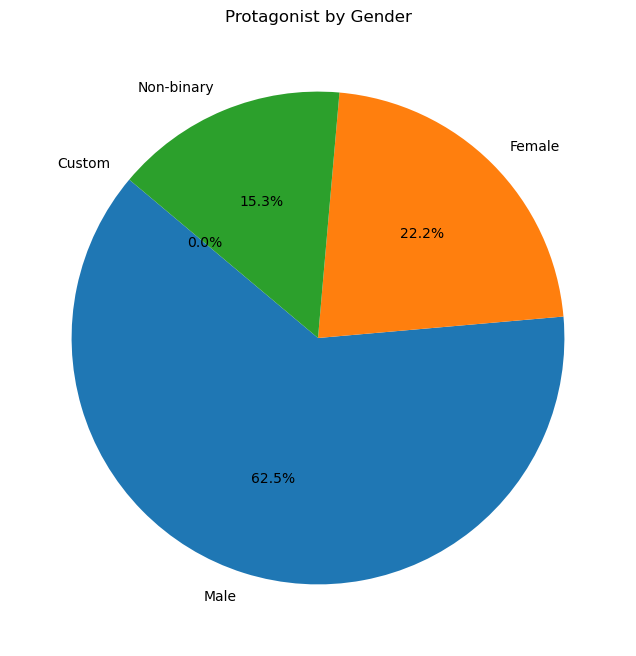

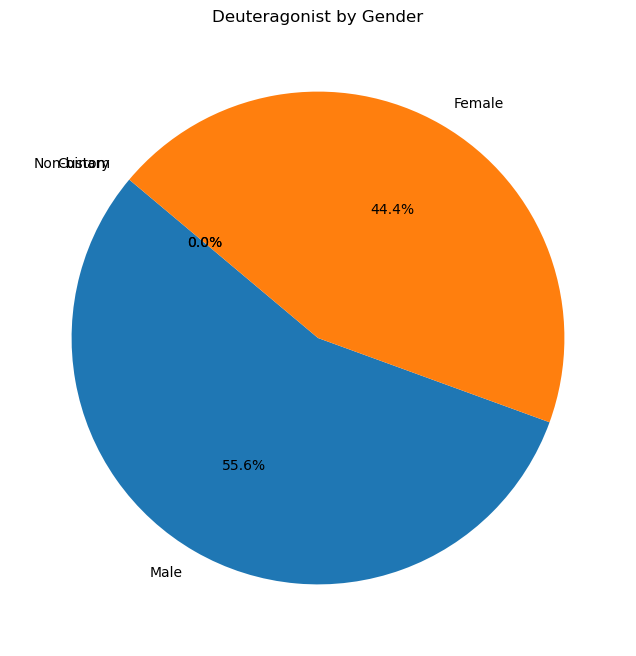

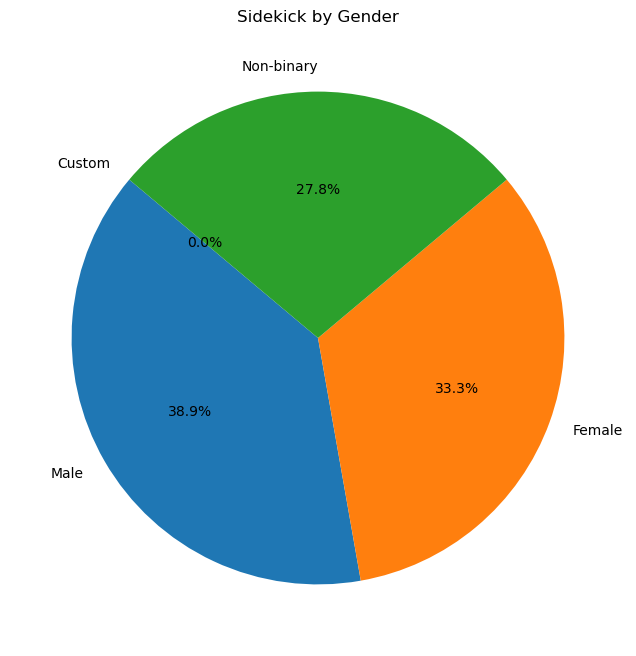

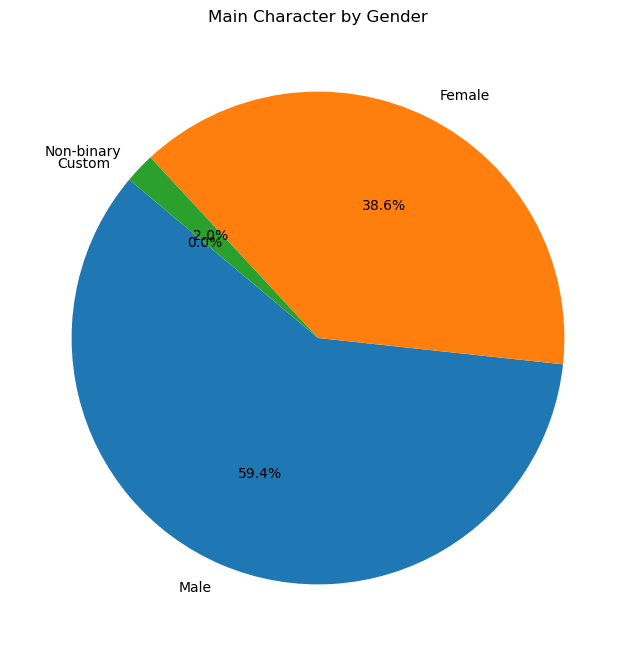

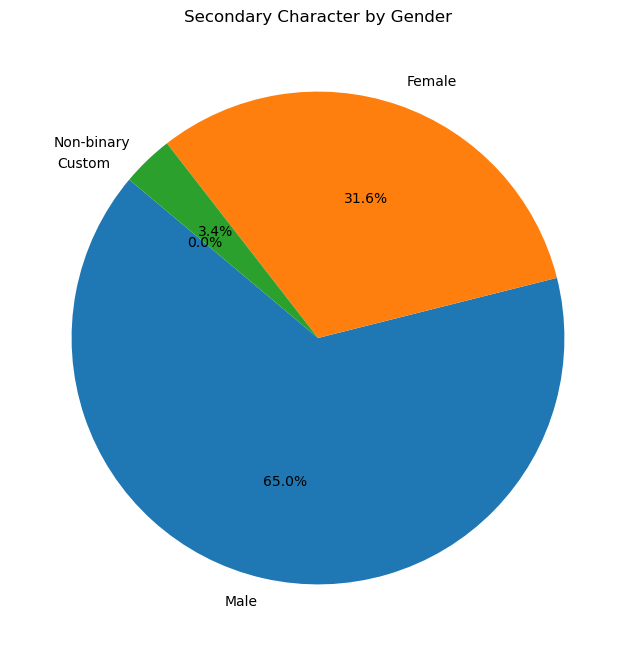

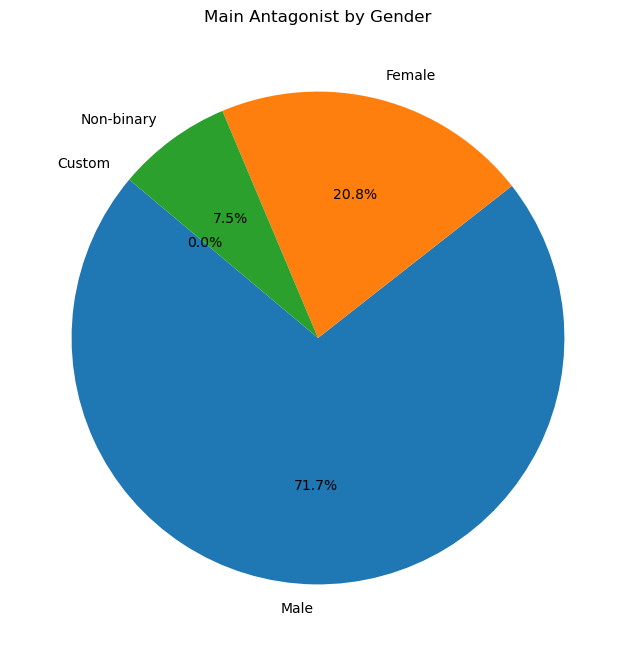

In [4732]:
for relevance, name in character_relevance_mapping.items():
    character_relevance_by_gender_pie_chart(relevance, name)

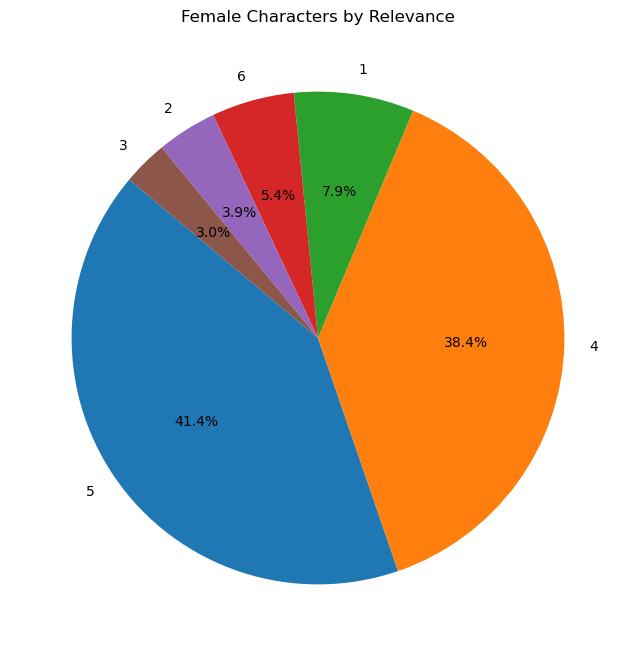

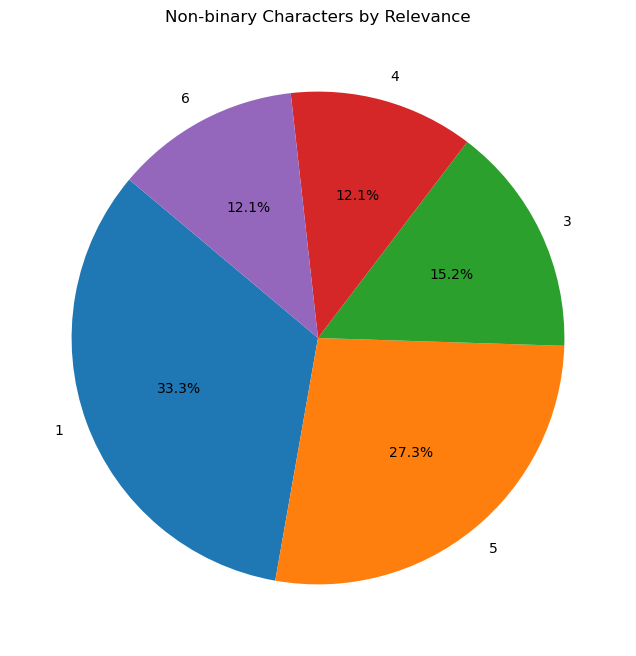

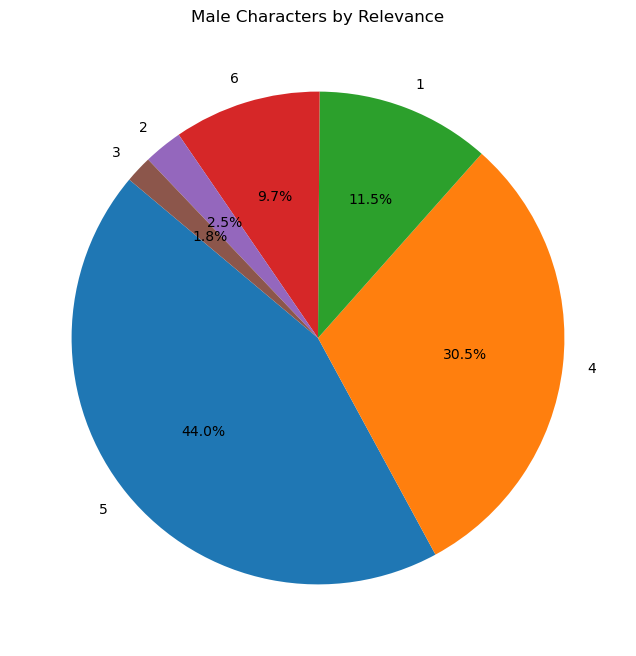

In [4733]:
import matplotlib.pyplot as plt

def gender_by_character_relevance_pie_chart(gender: str):
    # Filter the dataset to include only characters of the specified gender
    gender_characters = testing_data[testing_data['Character_gender'] == gender]

    # Count the number of characters by relevance
    characters_by_relevance = gender_characters['Character_relevance'].value_counts()

    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(characters_by_relevance, labels=characters_by_relevance.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'{gender} Characters by Relevance')
    plt.show()

# Generate pie charts for each gender
for gender in testing_data['Character_gender'].unique():
    gender_by_character_relevance_pie_chart(gender)

### Interpretation
The Kruskal-Wallis test has shown that there are significant differences between the character relevance across the different genders.  This means that the null hypothesis can be rejected.  However, this is not enough to determine if males have more main characters in video games in comparison to females and non-binary characters.

The pie charts show the distribution of character relevance across the different genders, and can see males have more main characters in video games, females have more secondary characters but are more likely to be main characters, and non-binary characters have more sidekicks, but again are mainly main characters, followed by secondary characters, then sidekicks.


### Additional testing: Mann Whitney U Test
I am curious to see if there are any significant differences between the character relevance across the Male and Female genders, as these are the two largest groups, and look similar in the pie charts.  I will perform a Mann Whitney U Test to determine if there are any significant differences between the character relevance

In [4734]:
# Perform the Mann Whitney U Test
from scipy.stats import mannwhitneyu

# Perform the Mann Whitney U Test
statistic, p_value = mannwhitneyu(male_relevance, female_relevance)

# Print the test results
print("Mann-Whitney U Test results:")
print(f"U statistic: {statistic}")
print(f"p-value: {p_value}")

# Check if the p-value is less than the significance level (e.g., 0.05)
if p_value < 0.05:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")

Mann-Whitney U Test results:
U statistic: 42484.0
p-value: 0.1654968700837317
There is no significant difference between the two groups.


#### Interpretation
The Mann Whitney U Test has shown that there is not a significant difference between the character relevance between males and females.  This means that if the comparrison was only between males and females, the null hypothesis would not be rejected, but as the Kruskal-Wallis test showed that there are significant differences between the character relevance across all genders, the null hypothesis can be rejected.

---

## Part B: Machine Learning models

### Dataset: Apple_Quality.csv

The dataset contains information about the quality of apples. The dataset contains the following columns (prior to processing):

| Column Name | Description                      | datatype |
|-------------|----------------------------------|----------|
| A_id        | Unique identifier for each apple | float64  |
| Size        | Size of the apple                | float64  |
| Weight      | Weight of the apple              | float64  |
| Sweetness   | Sweetness level of the apple     | float64  |
| Crunchiness | Crunchiness level of the apple   | float64  |
| Juiciness   | Juiciness level of the apple     | float64  |
| Ripeness    | Ripeness level of the apple      | float64  |
| Acidity     | Acidity level of the apple       | object   |
| Quality     | Quality rating of the apple      | object   |

The dataset contains 4001 rows and 9 columns prior to processing.



In [4735]:
# Load the dataset
apple_quality = pd.read_csv('data/Apple_Quality.csv')
apple_quality.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [4736]:
apple_quality.shape
print(f"Number of rows: {apple_quality.shape[0]}")
print(f"Number of columns: {apple_quality.shape[1]}")

Number of rows: 4001
Number of columns: 9


In [4737]:
apple_quality.columns


Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [4738]:
apple_quality.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

### Data Cleaning and processing

Before we can build machine learning models, the dataset will need to be cleaned and processed.  This will involve checking for missing values, duplicates, and converting the data types where necessary.

#### Missing values

First, the dataset will be checked for missing values.

If missing values are found, the following strategies can be used to handle them:

- Remove the rows with missing values
- Replace the missing values with the mean, median, or mode of the column
- Replace the missing values with a specific value


In [4739]:
apple_quality.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [4740]:
# Find rows with any missing values
rows_with_missing_values = apple_quality[apple_quality.isnull().any(axis=1)]

# Display the rows with missing values
print(rows_with_missing_values)

      A_id  Size  Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
4000   NaN   NaN     NaN        NaN          NaN        NaN       NaN   

                                Acidity Quality  
4000  Created_by_Nidula_Elgiriyewithana     NaN  


There is one row with multiple missing values.  It looks like this row is a footer row that only shows who created the dataset.  This row will be removed from the dataset.

In [4741]:
# Remove the row with missing values
apple_quality = apple_quality.dropna()
apple_quality.shape

(4000, 9)

The row with missing values has been removed from the dataset.  Next, the dataset will be checked for duplicates.

#### Duplicates

Next, the dataset will be checked for duplicates.  If duplicates are found, they will be removed from the dataset.

In [4742]:
# Find duplicates in the dataset
duplicates = apple_quality[apple_quality.duplicated()]
duplicates

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality


The dataset does not contain any duplicates.  The next action will be to convert the data types where necessary.

#### Data Type Conversion

Next, the data types of the columns will be reviewed and converted where necessary.  The 'Acidity' column will be converted to a float data type, and the 'Quality' column will be converted to a category data type.

In [4743]:
# Convert the 'Acidity' column to a float
apple_quality['Acidity'] = apple_quality['Acidity'].astype(float)
apple_quality.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

The data type of the 'acidity' column has been converted successfully.  Next, the dataset will be checked for missing values post the conversion.

In [4744]:
# Find rows with any missing values
rows_with_missing_values = apple_quality[apple_quality.isnull().any(axis=1)]

# Display the rows with missing values
if not rows_with_missing_values.empty:
    print(rows_with_missing_values)
else:
    print("There are no missing values in the dataset.")


There are no missing values in the dataset.


This conversion did not add any missing values to the dataset.  Next, the 'Quality' column will be converted to a category data type.

In [4745]:
# Convert the 'Quality' column to a category data type
apple_quality['Quality'] = apple_quality['Quality'].astype('category')
apple_quality.dtypes

A_id            float64
Size            float64
Weight          float64
Sweetness       float64
Crunchiness     float64
Juiciness       float64
Ripeness        float64
Acidity         float64
Quality        category
dtype: object

In [4746]:
apple_quality['Quality'].value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

The 'Quality' column has been converted to a category data type successfully.  The 'Quality' column now contains 2 categories: 'Good' and 'Bad'.

The datatypes have been converted successfully.  The dataset is now ready for analysis.

### Linear Regression: Explanation

#### Useful Terms:

- Algorithm: A set of rules or instructions used to solve a problem.
- Model: The result of applying an algorithm to data.
- Linear Regression Algorithm: Used to predict the value of a dependent variable based on one or more independent variables.
- Trained Model: A mathematical representation that can make predictions for new, unseen data.

#### Regression analysis:

The aim of regression analysis is to find the best-fitting line (or curve in more complex cases) that describes the relationship between the independent and dependent variables.

The line is called the regression line, and can then be used to make predictions for new data points.

Regression aims to predict the "regression" of the dependent variable towards the mean as it is influenced by the independent variables.

#### Linear Regression:

 Linear regression is a statistical method used to model the relationship between two or more variables.  It is used to predict the value of a dependent variable based on one or more independent variables.  The relationship is represented by a straight line.

In linear regression, the focus is on estimating the coefficients (slope and intercept) of the regression equation, which represents the best-fitting straight line that describes the relationship between the variables.

This line represents the "average" or "expected" change in the dependent variable for a unit change in the independent variable.

The regression equation allows us to make predictions and understand how changes in the independent variable(s) affect the dependent variable.


#### Split the data into training and testing sets


In [4747]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def split_data(x_col, y_col):
    # Split the data into independent and dependent variables
    x = apple_quality[[x_col]]
    y = apple_quality[[y_col]]

    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    return x_train, x_test, y_train, y_test

In [4748]:
apple_quality.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

For reference:

- [0] = x_train
- [1] = x_test
- [2] = y_train
- [3] = y_test

In [4749]:
# Split the data into training and testing sets

r_score = {}

# Size and ...
size_weight = split_data('Size', 'Weight')
size_weight_model = LinearRegression()
size_weight_model.fit(size_weight[0], size_weight[2])
r_score['Size vs Weight'] = size_weight_model.score(size_weight[1], size_weight[3])

size_sweetness = split_data('Size', 'Sweetness')
size_sweetness_model = LinearRegression()
size_sweetness_model.fit(size_sweetness[0], size_sweetness[2])
r_score['Size vs Sweetness'] = size_sweetness_model.score(size_sweetness[1], size_sweetness[3])

size_crunchiness = split_data('Size', 'Crunchiness')
size_crunchiness_model = LinearRegression()
size_crunchiness_model.fit(size_crunchiness[0], size_crunchiness[2])
r_score['Size vs Crunchiness'] = size_crunchiness_model.score(size_crunchiness[1], size_crunchiness[3])

size_juiciness = split_data('Size', 'Juiciness')
size_juiciness_model = LinearRegression()
size_juiciness_model.fit(size_juiciness[0], size_juiciness[2])
r_score['Size vs Juiciness'] = size_juiciness_model.score(size_juiciness[1], size_juiciness[3])

size_ripeness = split_data('Size', 'Ripeness')
size_ripeness_model = LinearRegression()
size_ripeness_model.fit(size_ripeness[0], size_ripeness[2])
r_score['Size vs Ripeness'] = size_ripeness_model.score(size_ripeness[1], size_ripeness[3])

size_acidity = split_data('Size', 'Acidity')
size_acidity_model = LinearRegression()
size_acidity_model.fit(size_acidity[0], size_acidity[2])
r_score['Size vs Acidity'] = size_acidity_model.score(size_acidity[1], size_acidity[3])

# Weight and ...
weight_sweetness = split_data('Weight', 'Sweetness')
weight_sweetness_model = LinearRegression()
weight_sweetness_model.fit(weight_sweetness[0], weight_sweetness[2])
r_score['Weight vs Sweetness'] = weight_sweetness_model.score(weight_sweetness[1], weight_sweetness[3])

weight_crunchiness = split_data('Weight', 'Crunchiness')
weight_crunchiness_model = LinearRegression()
weight_crunchiness_model.fit(weight_crunchiness[0], weight_crunchiness[2])
r_score['Weight vs Crunchiness'] = weight_crunchiness_model.score(weight_crunchiness[1], weight_crunchiness[3])

weight_juiciness = split_data('Weight', 'Juiciness')
weight_juiciness_model = LinearRegression()
weight_juiciness_model.fit(weight_juiciness[0], weight_juiciness[2])
r_score['Weight vs Juiciness'] = weight_juiciness_model.score(weight_juiciness[1], weight_juiciness[3])

weight_ripeness = split_data('Weight', 'Ripeness')
weight_ripeness_model = LinearRegression()
weight_ripeness_model.fit(weight_ripeness[0], weight_ripeness[2])
r_score['Weight vs Ripeness'] = weight_ripeness_model.score(weight_ripeness[1], weight_ripeness[3])

weight_acidity = split_data('Weight', 'Acidity')
weight_acidity_model = LinearRegression()
weight_acidity_model.fit(weight_acidity[0], weight_acidity[2])
r_score['Weight vs Acidity'] = weight_acidity_model.score(weight_acidity[1], weight_acidity[3])

# Sweetness and ...
sweetness_crunchiness = split_data('Sweetness', 'Crunchiness')
sweetness_crunchiness_model = LinearRegression()
sweetness_crunchiness_model.fit(sweetness_crunchiness[0], sweetness_crunchiness[2])
r_score['Sweetness vs Crunchiness'] = sweetness_crunchiness_model.score(sweetness_crunchiness[1], sweetness_crunchiness[3])

sweetness_juiciness = split_data('Sweetness', 'Juiciness')
sweetness_juiciness_model = LinearRegression()
sweetness_juiciness_model.fit(sweetness_juiciness[0], sweetness_juiciness[2])
r_score['Sweetness vs Juiciness'] = sweetness_juiciness_model.score(sweetness_juiciness[1], sweetness_juiciness[3])

sweetness_ripeness = split_data('Sweetness', 'Ripeness')
sweetness_ripeness_model = LinearRegression()
sweetness_ripeness_model.fit(sweetness_ripeness[0], sweetness_ripeness[2])
r_score['Sweetness vs Ripeness'] = sweetness_ripeness_model.score(sweetness_ripeness[1], sweetness_ripeness[3])

sweetness_acidity = split_data('Sweetness', 'Acidity')
sweetness_acidity_model = LinearRegression()
sweetness_acidity_model.fit(sweetness_acidity[0], sweetness_acidity[2])
r_score['Sweetness vs Acidity'] = sweetness_acidity_model.score(sweetness_acidity[1], sweetness_acidity[3])

# Crunchiness and ...
crunchiness_juiciness = split_data('Crunchiness', 'Juiciness')
crunchiness_juiciness_model = LinearRegression()
crunchiness_juiciness_model.fit(crunchiness_juiciness[0], crunchiness_juiciness[2])
r_score['Crunchiness vs Juiciness'] = crunchiness_juiciness_model.score(crunchiness_juiciness[1], crunchiness_juiciness[3])

crunchiness_ripeness = split_data('Crunchiness', 'Ripeness')
crunchiness_ripeness_model = LinearRegression()
crunchiness_ripeness_model.fit(crunchiness_ripeness[0], crunchiness_ripeness[2])
r_score['Crunchiness vs Ripeness'] = crunchiness_ripeness_model.score(crunchiness_ripeness[1], crunchiness_ripeness[3])

crunchiness_acidity = split_data('Crunchiness', 'Acidity')
crunchiness_acidity_model = LinearRegression()
crunchiness_acidity_model.fit(crunchiness_acidity[0], crunchiness_acidity[2])
r_score['Crunchiness vs Acidity'] = crunchiness_acidity_model.score(crunchiness_acidity[1], crunchiness_acidity[3])

# Juiciness and ...
juiciness_ripeness = split_data('Juiciness', 'Ripeness')
juiciness_ripeness_model = LinearRegression()
juiciness_ripeness_model.fit(juiciness_ripeness[0], juiciness_ripeness[2])
r_score['Juiciness vs Ripeness'] = juiciness_ripeness_model.score(juiciness_ripeness[1], juiciness_ripeness[3])

juiciness_acidity = split_data('Juiciness', 'Acidity')
juiciness_acidity_model = LinearRegression()
juiciness_acidity_model.fit(juiciness_acidity[0], juiciness_acidity[2])
r_score['Juiciness vs Acidity'] = juiciness_acidity_model.score(juiciness_acidity[1], juiciness_acidity[3])

ripeness_acidity = split_data('Ripeness', 'Acidity')
ripeness_acidity_model = LinearRegression()
ripeness_acidity_model.fit(ripeness_acidity[0], ripeness_acidity[2])
r_score['Ripeness vs Acidity'] = ripeness_acidity_model.score(ripeness_acidity[1], ripeness_acidity[3])


#### R-Scores

In [4750]:
# Print the R-scores
for key, value in r_score.items():
    print(f"{key}: {value}")

# Find the highest R-score
max_r_score = max(r_score, key=r_score.get)
print(f"The highest R-score is for the relationship: {max_r_score} - R-score: {r_score[max_r_score]}")

Size vs Weight: 0.033532941494992974
Size vs Sweetness: 0.13141848582020332
Size vs Crunchiness: 0.04397287609065781
Size vs Juiciness: -0.00255826922220459
Size vs Ripeness: 0.011047359858847527
Size vs Acidity: 0.04612103672435908
Weight vs Sweetness: 0.02512880518188665
Weight vs Crunchiness: 0.015551105270546928
Weight vs Juiciness: 0.0006180276705226584
Weight vs Ripeness: 0.06050714687021175
Weight vs Acidity: 0.00021049928688876562
Sweetness vs Crunchiness: -0.0011153257047318288
Sweetness vs Juiciness: 0.009625580628475738
Sweetness vs Ripeness: 0.07602215410544944
Sweetness vs Acidity: 0.005484278033885737
Crunchiness vs Juiciness: 0.07092574130458529
Crunchiness vs Ripeness: 0.05623659170207107
Crunchiness vs Acidity: -0.0002222631277057907
Juiciness vs Ripeness: 0.00802640540706856
Juiciness vs Acidity: 0.06144692036905364
Ripeness vs Acidity: 0.03674850176296951
The highest R-score is for the relationship: Size vs Sweetness - R-score: 0.13141848582020332


#### Regression Scatter Plot

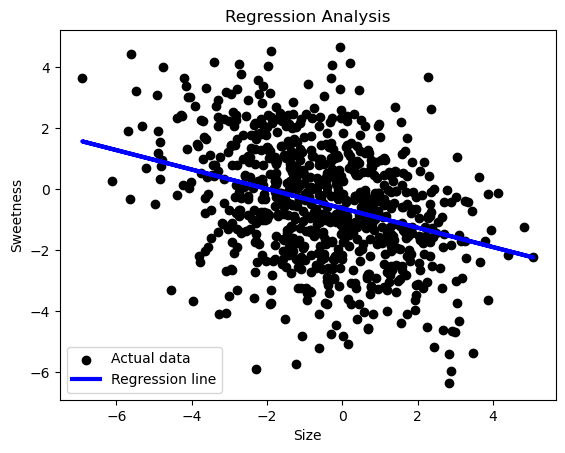

In [4751]:
import matplotlib.pyplot as plt

# [0] = x_train, [1] = x_test, [2] = y_train, [3] = y_test

x_train = size_sweetness[0]
x_test = size_sweetness[1]
y_train = size_sweetness[2]
y_test = size_sweetness[3]

y_pred = size_sweetness_model.predict(x_test)

# Plot the regression line for the highest R-score (Size vs Sweetness)
plt.scatter(x_test, y_test, color='black', label='Actual data')
plt.plot(x_test, y_pred, color='blue', linewidth=3, label='Regression line')
plt.xlabel('Size')
plt.ylabel('Sweetness')
plt.title('Regression Analysis')
plt.legend()
plt.show()

#### Interpretation

The linear regression models have been built successfully, and the R-scores have been calculated.  The R-scores show how well the independent variables predict the dependent variables.  The highest R-score is for the relationship between 'Size' and 'Sweetness'.

R-squared (R²) (calculated from R-value) is another measure of how well the regression line fits the data points. It ranges from 0 to 1, where 0 indicates that the regression line explains none of the variance in the data, and 1 indicates that the regression line perfectly fits the data .  The score is between 0.1 and 0.2 when run more than once, which is not a strong relationship.

The regression scatter plot shows the actual data points and the regression line for the relationship between 'Size' and 'Sweetness'.

The linear regression models can be used to make predictions for new data points based on the relationships between the variables.

This shows us that smaller apples are sweeter, and larger apples are less sweet.

This concludes the analysis of the Apple Quality dataset using linear regression models.

### Logistic Regression: Explanation
Logistic Regression is a statistical method used for binary classification, which means it's employed to predict one of two possible outcomes (usually represented as 0 or 1) based on input features.
It is a classification algorithm that is used when the dependent variable is binary (0 or 1, True or False, Yes or No), and not a true regression one.

It models the probability of the binary outcome using the logistic function, also known as the sigmoid function, which maps any input to a value between 0 and 1.
It is used to predict categorical variables.

We can use this to predict if an apple is of good quality or bad quality based on the features in the dataset.


#### Split the data into training and testing sets

In [4752]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

accuracy_score_dict = {}

# Split data into features (X) and target variable (y)
x = apple_quality[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]
y = apple_quality['Quality']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

# Calculate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Store the accuracy score
accuracy_score_dict['All Features'] = accuracy

Model Accuracy: 0.73


In [4753]:
def split_data_lr(x_col):
    # Split the data into independent and dependent variables
    x = apple_quality[[x_col]]
    y = apple_quality['Quality']

    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    return x_train, x_test, y_train, y_test

In [4754]:
# Size and Quality
size_quality = split_data_lr('Size')
size_quality_model = LogisticRegression()
size_quality_model.fit(size_quality[0], size_quality[2])
size_quality_y_pred = size_quality_model.predict(size_quality[1])
size_quality_accuracy = accuracy_score(size_quality[3], size_quality_y_pred)
print(f"Size vs Quality Model Accuracy: {size_quality_accuracy:.2f}")
# accuracy_score_dict['Size vs Quality'] = size_quality_accuracy

# Weight and Quality
weight_quality = split_data_lr('Weight')
weight_quality_model = LogisticRegression()
weight_quality_model.fit(weight_quality[0], weight_quality[2])
weight_quality_y_pred = weight_quality_model.predict(weight_quality[1])
weight_quality_accuracy = accuracy_score(weight_quality[3], weight_quality_y_pred)
print(f"Weight vs Quality Model Accuracy: {weight_quality_accuracy:.2f}")
accuracy_score_dict['Weight vs Quality'] = weight_quality_accuracy

# Sweetness and Quality
sweetness_quality = split_data_lr('Sweetness')
sweetness_quality_model = LogisticRegression()
sweetness_quality_model.fit(sweetness_quality[0], sweetness_quality[2])
sweetness_quality_y_pred = sweetness_quality_model.predict(sweetness_quality[1])
sweetness_quality_accuracy = accuracy_score(sweetness_quality[3], sweetness_quality_y_pred)
print(f"Sweetness vs Quality Model Accuracy: {sweetness_quality_accuracy:.2f}")
accuracy_score_dict['Sweetness vs Quality'] = sweetness_quality_accuracy

# Crunchiness and Quality
crunchiness_quality = split_data_lr('Crunchiness')
crunchiness_quality_model = LogisticRegression()
crunchiness_quality_model.fit(crunchiness_quality[0], crunchiness_quality[2])
crunchiness_quality_y_pred = crunchiness_quality_model.predict(crunchiness_quality[1])
crunchiness_quality_accuracy = accuracy_score(crunchiness_quality[3], crunchiness_quality_y_pred)
print(f"Crunchiness vs Quality Model Accuracy: {crunchiness_quality_accuracy:.2f}")
accuracy_score_dict['Crunchiness vs Quality'] = crunchiness_quality_accuracy

# Juiciness and Quality
juiciness_quality = split_data_lr('Juiciness')
juiciness_quality_model = LogisticRegression()
juiciness_quality_model.fit(juiciness_quality[0], juiciness_quality[2])
juiciness_quality_y_pred = juiciness_quality_model.predict(juiciness_quality[1])
juiciness_quality_accuracy = accuracy_score(juiciness_quality[3], juiciness_quality_y_pred)
print(f"Juiciness vs Quality Model Accuracy: {juiciness_quality_accuracy:.2f}")
accuracy_score_dict['Juiciness vs Quality'] = juiciness_quality_accuracy

# Ripeness and Quality
ripeness_quality = split_data_lr('Ripeness')
ripeness_quality_model = LogisticRegression()
ripeness_quality_model.fit(ripeness_quality[0], ripeness_quality[2])
ripeness_quality_y_pred = ripeness_quality_model.predict(ripeness_quality[1])
ripeness_quality_accuracy = accuracy_score(ripeness_quality[3], ripeness_quality_y_pred)
print(f"Ripeness vs Quality Model Accuracy: {ripeness_quality_accuracy:.2f}")
accuracy_score_dict['Ripeness vs Quality'] = ripeness_quality_accuracy

# Acidity and Quality
acidity_quality = split_data_lr('Acidity')
acidity_quality_model = LogisticRegression()
acidity_quality_model.fit(acidity_quality[0], acidity_quality[2])
acidity_quality_y_pred = acidity_quality_model.predict(acidity_quality[1])
acidity_quality_accuracy = accuracy_score(acidity_quality[3], acidity_quality_y_pred)
print(f"Acidity vs Quality Model Accuracy: {acidity_quality_accuracy:.2f}")
accuracy_score_dict['Acidity vs Quality'] = acidity_quality_accuracy


Size vs Quality Model Accuracy: 0.61
Weight vs Quality Model Accuracy: 0.46
Sweetness vs Quality Model Accuracy: 0.60
Crunchiness vs Quality Model Accuracy: 0.52
Juiciness vs Quality Model Accuracy: 0.62
Ripeness vs Quality Model Accuracy: 0.61
Acidity vs Quality Model Accuracy: 0.45


In [4755]:
# Find the highest accuracy score
max_accuracy_score = max(accuracy_score_dict, key=accuracy_score_dict.get)
print(f"The highest accuracy score is for the relationship: {max_accuracy_score} - Accuracy score: {accuracy_score_dict[max_accuracy_score]}")

The highest accuracy score is for the relationship: All Features - Accuracy score: 0.72875


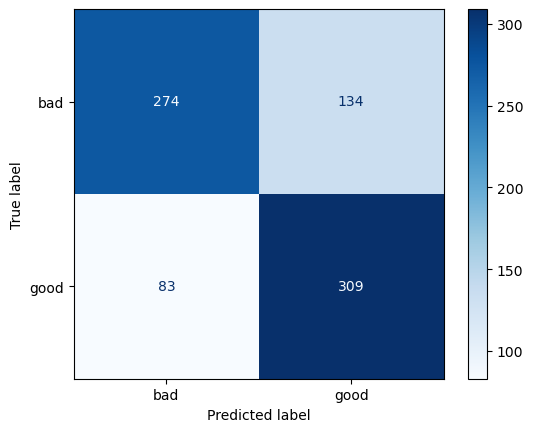

Accuracy Score: 72.88%


In [4756]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

# Customize the display labels to use 'Setosa' and 'Versicolor' instead of 0 and 1
labels = ['Setosa', 'Versicolor']

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy * 100:.2f}%")

#### Interpretation

The logistic regression models have been built successfully, and the accuracy scores have been calculated.  The accuracy scores show how well the independent variables predict the dependent variable 'Quality'.

The highest accuracy score came from the relationship between the all the 'float' columns and the 'Quality' category column.

The confusion matrix shows the true positive, true negative, false positive, and false negative values for the logistic regression model.  The model accuracy is also displayed.

The confusion matrix shows how well the model is performing in terms of predicting the quality of the apples.  The results show us that there are some false positives and false negatives, but the model is performing well overall (74%).

##### Additional: 2nd highest accuracy score

I am curious to see what the second highest accuracy score is, and the confusion matrix for this relationship.  By completing this analysis, I will have a direct comparison with the highest score found in the linear regression analysis.

In [4757]:
# Find the second highest accuracy score
accuracy_score_dict.pop(max_accuracy_score)
second_max_accuracy_score = max(accuracy_score_dict, key=accuracy_score_dict.get)
print(f"The second highest accuracy score is for the relationship: {second_max_accuracy_score} - Accuracy score: {accuracy_score_dict[second_max_accuracy_score]}")

The second highest accuracy score is for the relationship: Juiciness vs Quality - Accuracy score: 0.61625


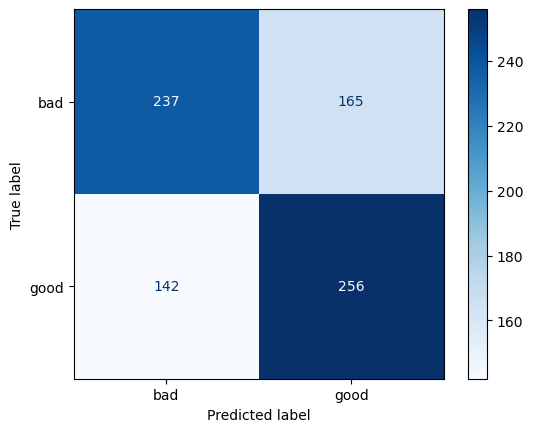

In [4759]:
# Find the confusion matrix for the second highest accuracy score

cm = confusion_matrix(juiciness_quality[3], juiciness_quality_y_pred)

# Customize the display labels to use 'Setosa' and 'Versicolor' instead of 0 and 1
labels = ['Setosa', 'Versicolor']

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


This relationship has a lower accuracy score than the highest score, but the model is still performing well at 61% with slightly more false positives and false negatives.

### Comparison, Analysis & Conclusions

#### Linear Regression and Logistic Regression Summary

Linear Regression: Analysis of the Apple Quality dataset using linear regression models showed the relationship between the independent variables and the dependent variables.  The R-scores were calculated to determine how well the independent variables predict the dependent variables.  The highest R-score was for the relationship between 'Size' and 'Sweetness' which was not very high.  The regression scatter plot showed the actual data points and the regression line for this relationship.

Logistic Regression: Analysis of the Apple Quality dataset using logistic regression models showed the relationship between the independent variables and the dependent variable 'Quality'.  The accuracy scores were calculated to determine how well the independent variables predict the dependent variable.  The highest accuracy score was for the relationship between all the 'float' columns and the 'Quality' category column.  The confusion matrix showed the true positive, true negative, false positive, and false negative values for the logistic regression model.

The logistic regression model performed better than the linear regression model in terms of accuracy, with an accuracy of over 70% compared to the R-scores which were between 0.1 and 0.2.

Additionally, The second-highest accuracy score was found to be 61% with slightly more false positives and false negatives, but still outperformed the linear regression models.  This was a good comparison to see the difference between the two models.

#### Machine Learning Concepts


##### Data sets:

Labeled Datasets: The Apple Quality dataset was a labeled dataset, meaning that each data point had a corresponding label (in this case, 'Good' or 'Bad').  Each data point in the set is associated with a known category or value, making it suitable for supervised learning.
These labels provide a clear indication, facilitating model training and evaluation.


Unlabelled Datasets: If the Apple Quality dataset did not contain the 'Quality' column, it would be an unlabelled dataset.  This type of dataset is used for unsupervised learning, where the model must find patterns or relationships in the data without the aid of labels.  Unlabelled data is used for tasks like clustering, anomaly detection, and dimensionality reduction, where the goal is to identify patterns or group similar data points without known outcomes.

##### Supervised Learning:
Supervised learning is a type of machine learning where the algorithm is trained on a labelled dataset.  The algorithm learns to map input data to the correct output based on the input-output pairs provided during training.  The goal is to learn a mapping function that can make predictions on new, unseen data.  Supervised learning is widely used for tasks requiring regression, and classification.  The goal is to minimize the difference between predicted and actual outputs during training.

Regression: Regression is a type of supervised learning used to predict continuous values.  It is used when the output variable is a real or continuous value.  Linear regression is a common regression technique used to model the relationship between two or more variables.  The goal is to find the best-fitting line that describes the relationship between the variables and minimises the difference between predicted and actual values.

Classification: Classification is a type of supervised learning used to predict discrete categories or classes.  It is used when the output variable is a category or label.  Logistic regression is a common classification technique used to predict binary outcomes.  The goal is to classify data into the correct categories based on patterns.


##### Unsupervised Learning:
Unsupervised learning is a type of machine learning where the algorithm is trained on an unlabelled dataset, without explicit output labels.
The goal is to find patterns or relationships in the data without the aid of labels.  Unsupervised learning is used for tasks like clustering, anomaly detection, and dimensionality reduction.  The algorithm learns to group similar data points together, clustering them based on inherent similarities.

Unsupervised learning is valuable when the output is unknown or challenging to obtain, enabling data exploration and pattern discovery without human intervention.
 Examples include customer segmentation (grouping customers with similar behaviours), anomaly detection (finding unusual patterns in data), and dimensionality reduction (compressing data while preserving essential features).

###### Clustering:
Clustering is a type of unsupervised learning used to group similar data points together.

The goal is to identify patterns or groupings in the data without predefined categories.

Clustering algorithms like K-means and hierarchical clustering are used to seperate data into clusters based on similarities such as image, anomoly or customer segmentation.

###### Dimensionality Reduction:
Dimensionality reduction is a type of unsupervised learning used to reduce the number of features in a dataset while preserving essential data.  The goal is to simplify the dataset by removing irrelevant or redundant features, reducing computational complexity, and improving model performance.

Principal Component Analysis (PCA) and t-distributed Stochastic Neighbour are popular dimensionality reduction methods.



##### One Hot Encoding:

One Hot Encoding is a technique used to convert categorical data into a numerical format that can be used for machine learning algorithms.  It is used when the data is categorical and cannot be directly used in the model.  One Hot Encoding creates binary columns for each category in the data, assigning a 1 or 0 to each column based on the presence of the category.

This allows to assign an integer to categories and convert them to binary format, instead of simply assigning each one a number which could be interpreted as a ranking.

For example:

In [4761]:
# One Hot Encoding
apple_quality = pd.get_dummies(apple_quality)
apple_quality.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality_bad,Quality_good
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,False,True
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,False,True
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,True,False
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,False,True
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,False,True
